# Tenseurs

Les tenseurs sont une structure de données spécialisée très similaire aux tableaux et aux matrices.
Dans PyTorch, nous utilisons les tenseurs pour coder les entrées et les sorties d'un modèle, ainsi que les paramètres du modèle.


Les tenseurs sont similaires aux tableaux `NumPy` et aux `ndarrays`, sauf que les tenseurs peuvent fonctionner sur des GPUs ou d'autres accélérateurs matériels. En fait, les tenseurs et les tableaux NumPy peuvent souvent partager la même adresse mémoire sous-jacente avec une capacité appelée `bridge-to-np-label`, ce qui élimine le besoin de copier les données. Les tenseurs sont également optimisés pour la différenciation automatique (nous verrons cela plus tard ). Si vous êtes familier avec les `ndarrays`, vous serez à l'aise avec l'API des tenseurs.

Commençons par mettre en place notre environnement.

In [1]:
import torch
import numpy as np

# Initialisation d'un tenseur

Les tenseurs peuvent être initialisés de différentes manières. Regardez les exemples suivants.

## Directement à partir de données

Les tenseurs peuvent être créés directement à partir de données. Le type de données est automatiquement déduit.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

## A partir d'un tableau NumPy

Les tenseurs peuvent être créés à partir de tableaux NumPy et vice versa.  Puisque numpy _'np_array'_ et tensor _'x_np'_ partagent le même emplacement mémoire, changer la valeur de l'un modifiera l'autre.

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



## A partir d'un autre tenseur

Le nouveau tenseur conserve les propriétés (forme, type de données) du tenseur argument, à moins qu'il ne soit explicitement remplacé.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7243, 0.7732],
        [0.2601, 0.2174]]) 



## Avec des valeurs aléatoires ou constantes

`shape` est défini par un tuple de dimensions de tenseur, qui définit le nombre de lignes et de colonnes dans un tenseur. Dans les fonctions ci-dessous, `shape` détermine la dimensionnalité du tenseur de sortie.

In [5]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8015, 0.1767, 0.6034],
        [0.4992, 0.0036, 0.9915]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Attributs d'un tenseur

Les attributs d'un tenseur décrivent sa forme, son type de données et le dispositif sur lequel il est stocké.

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Opérations sur les tenseurs

Il existe plus de 100 opérations sur les tenseurs, y compris l'arithmétique, l'algèbre linéaire, la manipulation de matrices (comme la transposition, l'indexation et le découpage). Pour l'échantillonnage et l'examen, vous trouverez une description complète [ici](https://pytorch.org/docs/stable/torch.html).

Chacune de ces opérations peut être exécutée sur le GPU (à des vitesses généralement plus élevées que sur un
CPU).
- Les CPU ont jusqu'à 64 cœurs. Les cœurs sont des unités qui effectuent le calcul proprement dit. Chaque cœur traite les tâches dans un ordre séquentiel (une tâche à la fois).
- Les GPU ont des milliers de cœurs.  Les cœurs des GPU effectuent des calculs en parallèle. Les tâches sont réparties et traitées entre les différents cœurs. C'est ce qui rend les GPU plus rapides que les CPU dans la plupart des cas. Les GPU sont plus performants pour les données de grande taille que pour les données de petite taille. Les GPU sont généralement utilisés pour les calculs intensifs de graphiques ou de réseaux neuronaux.
- PyTorch peut utiliser la bibliothèque Nvidia CUDA pour tirer parti de leurs cartes GPU.


Par défaut, les tenseurs sont créés sur le CPU. Les tenseurs peuvent également être calculés sur des GPUs ; pour cela, vous devez les déplacer en utilisant la méthode `.to` (après avoir vérifié la disponibilité des GPUs). Gardez à l'esprit que la copie de tenseurs de grande taille sur différents périphériques peut être coûteuse en termes de temps et de mémoire !

In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

Essayez certaines des opérations de la liste.
Si vous êtes familier avec l'API NumPy, vous trouverez l'API Tensor très facile à utiliser.

## Indexation et découpage standard de type NumPy

In [8]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joindre des tenseurs
Vous pouvez utiliser [`torch.cat`](https://pytorch.org/docs/stable/generated/torch.cat.html) pour concaténer une séquence de tenseurs le long d'une *dimension donnée*.
[`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html) est une option connexe de jonction de tenseurs qui concatène une séquence de tenseurs le long d'une *nouvelle* dimension.

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Opérations arithmétiques

In [10]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## Tenseurs à un seul élément
Si vous avez un tenseur à un élément, par exemple en agrégeant toutes les valeurs d'un tenseur en une seule valeur, vous pouvez le convertir en valeur numérique Python
en utilisant `item()` :

In [11]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


## Opérations sur place
Les opérations qui stockent le résultat dans l'opérande sont appelées "in-place". Elles sont désignées par un suffixe ``_``.
Par exemple : ``x.copy_(y)``, ``x.t_()``, changeront ``x``.

>**Note:** Les opérations in-place permettent d'économiser de la mémoire, mais peuvent être problématiques lors du calcul des dérivées à cause de la perte immédiate de l'historique. Leur utilisation est donc déconseillée.

In [12]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Pont avec NumPy

Les tenseurs sur le CPU et les tableaux NumPy peuvent partager leurs emplacements mémoire sous-jacents, et la modification de l'un modifiera l'autre.

### Tenseur vers tableau NumPy

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


Un changement dans le tenseur se reflète dans le tableau NumPy.

### NumPy array à tensor

In [15]:
n = np.ones(5)
t = torch.from_numpy(n)

Les changements dans le tableau NumPy se reflètent dans le tenseur.

In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets et Dataloaders

Le code de traitement des échantillons de données peut devenir complexe et difficile à maintenir. Nous souhaitons généralement que le code de nos ensembles de données soit découplé du code d'apprentissage de nos modèles, pour une meilleure lisibilité et modularité.
PyTorch fournit deux primitives de données : ``torch.utils.data.DataLoader`` et ``torch.utils.data.Dataset``
qui vous permettent d'utiliser des jeux de données pré-chargés ainsi que vos propres données.
``Dataset`` stocke les échantillons et leurs étiquettes correspondantes, et ``DataLoader`` enroule un itérable autour de ``Dataset`` pour permettre un accès facile aux échantillons.

Les bibliothèques de domaine PyTorch fournissent un certain nombre de jeux de données pré-chargés (comme **_FashionMNIST_**) qui sous-classent ``torch.utils.data.Dataset`` et implémentent des fonctions spécifiques aux données particulières. Les exemples pour le prototypage et l'évaluation de votre modèle incluent :
- Jeux de données d'images
- Jeux de données texte
- Jeux de données audio

## Chargement d'un jeu de données

Nous allons charger le jeu de données Fashion-MNIST de TorchVision. Fashion-MNIST est un jeu de données d'images d'articles de Zalando composé de 60 000 exemples d'entraînement et de 10 000 exemples de test.  Chaque exemple comprend une image en niveaux de gris de 28×28 et une étiquette associée à l'une des 10 classes.  

 - Chaque image a une hauteur de 28 pixels et une largeur de 28 pixels, soit un total de 784 pixels
 - Les 10 classes indiquent de quel type d'image il s'agit, par exemple : T-shirt/top, pantalon, pull-over, robe, sac, botte de cheville, etc.
 - Les pixels en niveaux de gris ont des valeurs comprises entre 0 et 255 qui mesurent l'intensité des images en noir et blanc.  La valeur de l'intensité augmente du blanc au noir. Par exemple : une couleur blanche vaut 0, tandis qu'une couleur noire vaut 255.




Nous chargeons l'ensemble de données FashionMNIST avec les paramètres suivants :
 - **root** est le chemin d'accès où les données d'entraînement et de test sont stockées.
 - **train** spécifie l'ensemble de données d'entraînement ou de test.
 - **download=True** télécharge les données à partir d'Internet si elles ne sont pas disponibles à la racine.
 - **transform** et `target_transform` spécifient les transformations des caractéristiques et des étiquettes.

In [17]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10326444.31it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174706.68it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3215734.05it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19024032.59it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Itération et visualisation de l'ensemble de données
-----------------

Nous pouvons indexer ``Datasets`` manuellement comme une liste : ``training_data[index]``.
Nous utilisons ``matplotlib`` pour visualiser certains échantillons de nos données d'entraînement.

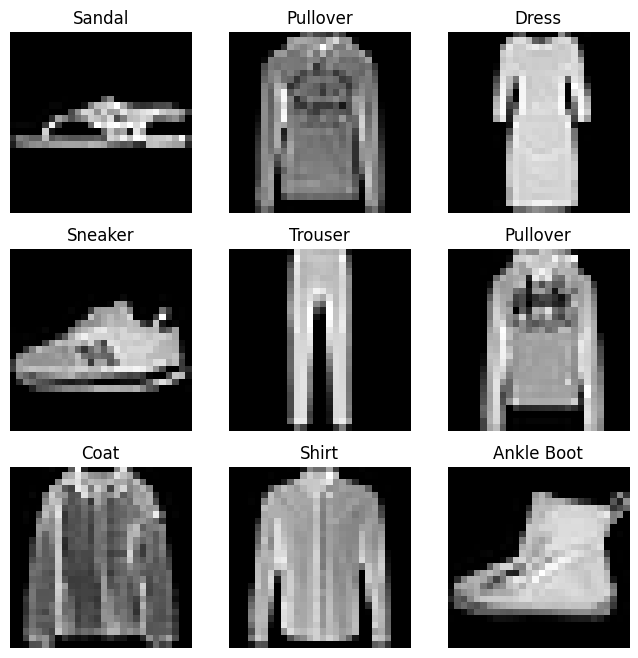

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Préparer vos données pour l'entrainement avec DataLoaders
-------------------------------------------------
Le ``Dataset`` récupère les caractéristiques et les étiquettes de notre jeu de données, un échantillon à la fois. Lors de l'apprentissage d'un modèle, nous voulons typiquement
passer les échantillons en "minibatchs", remanier les données à chaque epoch pour réduire le surajustement du modèle, et utiliser le multiprocessing de Python pour accélérer la récupération des données.

En apprentissage automatique, vous devez spécifier les caractéristiques et les étiquettes de votre ensemble de données. Les **caractéristiques** sont des données d'entrée et les **étiquettes** sont des données de sortie.

  - Les caractéristiques sont les motifs des pixels des images
  - Les étiquettes sont nos 10 types de classes :  T-shirt, Sandale, Robe, etc

Le ``DataLoader`` est un itérable qui abstrait cette complexité pour nous dans une API plus simple. Pour utiliser le Dataloader, nous devons définir les paramètres suivants :

 - **data** les données d'entraînement qui seront utilisées pour entraîner le modèle, et les données de test pour évaluer le modèle
 - **batch_size**  : le nombre d'enregistrements à traiter dans chaque lot.
 - **shuffle** l'échantillonage aléatoire des données par indices

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Itérer à travers le DataLoader

Nous avons chargé ce jeu de données dans le `Dataloader` et nous pouvons maintenant itérer à travers le jeu de données.
Chaque itération ci-dessous retourne un batch de `train_features` et `train_labels` (contenant respectivement `batch_size=64` features et labels). Parce que nous avons spécifié `shuffle=True`, après avoir itéré sur tous les lots, les données sont mélangées, pour un contrôle plus fin sur l'ordre de chargement des données.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


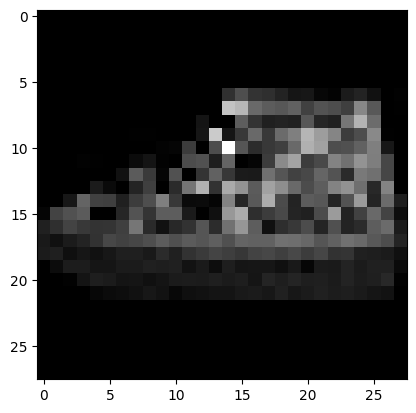

Label: Sneaker


In [20]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

# Normalisation

La normalisation est une technique courante de prétraitement des données qui est appliquée pour mettre à l'échelle ou transformer les données afin de s'assurer que chaque caractéristique apporte une contribution égale à l'apprentissage. Par exemple, chaque pixel des images en niveaux de gris a une valeur comprise entre 0 et 255, qui sont des caractéristiques. Si la valeur d'un pixel est de 17 et celle d'un autre de 197. Il y aura une distribution inégale de l'importance des pixels, car les volumes de pixels les plus élevés dévieront l'apprentissage. La normalisation modifie l'étendue de vos données, sans fausser la distinction entre nos caractéristiques. Ce prétraitement est effectué pour éviter :

- une réduction de la précision de la prédiction
- une difficulté d'apprentissage pour le modèle
- Une distribution défavorable des plages de données des caractéristiques

## Transformations

Les données ne se présentent pas toujours sous la forme traitée finale requise pour
pour l'apprentissage des algorithmes d'apprentissage automatique. Nous utilisons des **transformations** pour manipuler les données et les rendre aptes à l'apprentissage.

Tous les jeux de données de TorchVision ont deux paramètres (`transform` pour modifier les caractéristiques et
`target_transform` pour modifier les étiquettes) qui acceptent des callables contenant la logique de transformation. Le module `torchvision.transforms` offre plusieurs
plusieurs transformations couramment utilisées.

Les caractéristiques FashionMNIST sont au format PIL Image, et les étiquettes sont des entiers.
Pour l'entraînement, nous avons besoin des caractéristiques sous forme de tenseurs normalisés, et des étiquettes sous forme de tenseurs codés à une position.
Pour effectuer ces transformations, nous utiliserons `ToTensor` et `Lambda`.

In [21]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

`ToTensor` convertit une image PIL ou un `ndarray` NumPy en un `FloatTensor` et met à l'échelle les valeurs d'intensité des pixels de l'image dans l'intervalle \[0., 1.\].

## Transformations lambda

Les transformations lambda appliquent n'importe quelle fonction lambda définie par l'utilisateur. Ici, nous définissons une fonction
pour transformer l'entier en un tenseur codé en un seul point.
Elle crée d'abord un tenseur zéro de taille 10 (le nombre d'étiquettes dans notre jeu de données) et appelle scatter qui attribue une valeur de
1 à l'index donné par l'étiquette _y_. Vous pouvez aussi utiliser `torch.nn.functional.one_hot` comme autre option pour faire cela.

In [22]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Qu'est-ce qu'un réseau neuronal ?

Un réseau neuronal est un ensemble de **neurones** reliés par des couches. Chaque neurone est une petite
unité de calcul qui effectue des calculs simples pour résoudre collectivement un problème. Les neurones sont
organisés en 3 types de couches : la couche d'entrée, la couche cachée et la couche de sortie.
Les couches cachées et de sortie contiennent un certain nombre de neurones.


## Composants d'un réseau neuronal

- Une **fonction d'activation** détermine si un neurone doit être activé ou non. Les calculs effectués dans un réseau neuronal comprennent l'application d'une fonction d'activation. Si un neurone s'active, cela signifie que l'entrée est importante. Il existe différents types de fonctions d'activation. Le choix de la fonction d'activation à utiliser dépend de la nature de la sortie. Un autre rôle important d'une fonction d'activation est d'ajouter de la non-linéarité au modèle.

    - La fonction _Binary_ est utilisée pour mettre un nœud de sortie à 1 si le résultat de la fonction est positif et à 0 si le résultat de la fonction est nul ou négatif. f(x)= \begin{cases} 0, & \text{if } x < 0\\ 1, & \text{if } x\geq 0\\ \end{cases}
    - _Sigmoïde_ est utilisé pour prédire la probabilité qu'un nœud de sortie soit compris entre 0 et 1. $f(x) = {\large \frac{1}{1+e^{-x}}}$
    - _Tanh_ est utilisé pour prédire si un nœud de sortie est compris entre 1 et -1, pour les cas d'utilisation de la classification. $f(x) = {\large \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}} $
    - La _ReLU_ (*fonction d'activation linéaire rectifiée*) est utilisée pour mettre le nœud de sortie à 0 si le résultat de la fonction est négatif et conserve la valeur du résultat si celui-ci est positif. f(x)= \begin{cases} 0, & \text{if } x < 0\\ x, & \text{if } x\geq 0\\ \end{cases}
- Les **poids** influencent la proximité de la sortie de notre réseau par rapport à la valeur de sortie attendue. Lorsqu'une entrée entre dans le neurone, elle est multipliée par une valeur de poids et la sortie résultante est soit observée, soit transmise à la couche suivante du réseau neuronal. Les poids de tous les neurones d'une couche sont organisés en un tenseur.
- Le **biais** représente la différence entre la sortie de la fonction d'activation et la sortie prévue.



Nous pouvons dire qu'une sortie $y$ d'une couche de réseau neuronal avec des poids $W$ et un biais $b$ est calculée comme la somme des entrées multipliées par les poids plus le biais. $x = \sum{(poids * entrées) + biais} $, où $f(x)$ est la fonction d'activation.

# Construire un réseau neuronal

Les réseaux neuronaux sont constitués de couches et de modules qui effectuent des opérations sur les données. L'espace de noms `torch.nn` fournit tous les blocs de construction dont vous aurez besoin pour construire votre propre réseau neuronal. Chaque module de PyTorch sous-classe `nn.Module`. Un réseau neuronal est lui-même un module composé d'autres modules (couches). Cette structure imbriquée permet de construire et de gérer facilement des architectures complexes.

Dans les sections suivantes, nous allons construire un réseau neuronal pour classer les images de l'ensemble de données FashionMNIST.

In [23]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Obtenir du hardware pour l'entraînement

Nous voulons pouvoir entraîner notre modèle sur un accélérateur matériel tel qu'un GPU, s'il est disponible. Vérifions si `torch.cuda` est disponible; si ce n'est pas le cas, nous continuerons à utiliser le CPU.

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


## Définir la classe

Nous définissons notre réseau neuronal en sous-classant `nn.Module`, et nous initialisons les couches du réseau neuronal dans `__init__`. Chaque sous-classe de `nn.Module` implémente les opérations sur les données d'entrée dans la méthode `forward`.

Notre réseau neuronal se compose des éléments suivants :

- La couche d'entrée avec 28x28 ou 784 caractéristiques/pixels.
- Le premier module linéaire prend les 784 caractéristiques d'entrée et les transforme en une couche cachée de 512 caractéristiques.
- La fonction d'activation ReLU sera appliquée dans la transformation.
- Le deuxième module linéaire prend 512 caractéristiques en entrée de la première couche cachée et les transforme en 512 caractéristiques dans la couche cachée suivante.
- La fonction d'activation ReLU sera appliquée dans la transformation.
- Le troisième module linéaire prend 512 caractéristiques en entrée de la deuxième couche cachée et les transforme en couche de sortie avec 10, qui est le nombre de classes.
- La fonction d'activation ReLU sera appliquée dans la transformation.

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Nous créons une instance de `NeuralNetwork`, nous la déplaçons sur `device` et nous imprimons sa structure.
sa structure.

In [26]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Pour utiliser le modèle, nous lui transmettons les données d'entrée. Cela exécute le `forward` du modèle, ainsi que quelques opérations en arrière-plan. Cependant, n'appelez pas `model.forward()` directement ! L'appel du modèle sur les données d'entrée renvoie un tenseur à 10 dimensions avec les valeurs prédites brutes pour chaque classe.

Nous obtenons les densités de prédiction en les passant à travers une instance de `nn.Softmax`.

In [27]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='cuda:0')


## Poids et biais


Le module `nn.Linear` initialise aléatoirement les ${weights}$ et ${ bias}$ pour chaque couche et stocke en interne les valeurs dans des Tenseurs.

In [28]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")

print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[-0.0175,  0.0336,  0.0039,  ...,  0.0136,  0.0038,  0.0198],
        [-0.0314, -0.0196, -0.0240,  ..., -0.0143, -0.0110, -0.0244],
        [-0.0011,  0.0317, -0.0321,  ..., -0.0160, -0.0321, -0.0065],
        ...,
        [-0.0095,  0.0336, -0.0183,  ..., -0.0221,  0.0251, -0.0029],
        [-0.0353,  0.0126,  0.0232,  ..., -0.0260,  0.0151,  0.0217],
        [ 0.0082, -0.0139,  0.0212,  ..., -0.0229,  0.0091, -0.0046]],
       device='cuda:0', requires_grad=True) 

First Linear biases: Parameter containing:
tensor([-2.4022e-02,  1.0361e-02,  1.6576e-02, -1.3333e-02, -2.4206e-03,
         7.5577e-03,  3.3727e-02,  3.0883e-02, -3.2969e-02, -1.3902e-02,
        -1.0854e-02,  1.1722e-02, -1.0187e-02, -2.1519e-02, -2.1805e-02,
        -3.1644e-02,  1.4266e-02, -1.4623e-02,  1.8836e-02, -1.2628e-02,
         9.3002e-03, -3.2353e-02, -5.4218e-03,  2.9240e-03, -2.4175e-02,
         1.6056e-02, -1.9283e-02, -1.0349e-02,  6.3722e-03, -3.3704e

## Couches du modèle

Décomposons les couches du modèle FashionMNIST. Pour l'illustrer, nous
prenons un mini-lot de 3 images de taille **28x28** et voyons ce qu'il en advient lorsque nous le faisons passer dans le réseau.

In [67]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

Nous initialisons la couche `nn.Flatten` pour convertir chaque image 2D 28x28 en un tableau contigu de 784 valeurs de pixels, c'est-à-dire que la dimension du minibatch (à dim=0) est maintenue. Chacun des pixels est transmis à la couche d'entrée du réseau neuronal.  

<img alt="Diagramme montrant comment les pixels d'une image sont aplatis." src="../images/4-model-3.png" />

In [30]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn. Linear

La couche linéaire est un module qui applique une transformation linéaire à l'entrée à l'aide des poids et des biais qu'il a stockés. La valeur en niveaux de gris de chaque pixel de la couche d'entrée sera connectée aux neurones de la couche cachée pour le calcul. Le calcul utilisé pour la transformation est ${{poids * entrée + biais}} $.

In [31]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Les activations non linéaires créent les correspondances complexes entre les entrées et les sorties du modèle.
Elles sont appliquées après les transformations linéaires pour introduire la *non-linéarité*, ce qui permet aux réseaux neuronaux d'apprendre une grande variété de phénomènes.
Dans ce modèle, nous utilisons `nn.ReLU` entre nos couches linéaires, mais il existe d'autres activations pour introduire la non-linéarité dans votre modèle.

La fonction d'activation ReLU prend la sortie du calcul de la couche linéaire et remplace les valeurs négatives par des zéros.

Sortie linéaire : ${ x = {poids * entrée + biais}} $.  
ReLU :
$f(x)=
\begin{cases}
    0, & \text{if } x < 0\\
    x, & \text{if } x\geq 0\\
\end{cases}
$

In [32]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.4520, -0.4698, -0.3244,  0.5366, -0.2308, -0.1813,  0.3536,  0.0967,
         -0.1782,  0.2519,  0.0278,  0.5690,  0.0106, -0.1746, -0.1091,  0.5944,
          0.1992,  0.2681,  0.2368, -0.1746],
        [ 0.0608, -0.3350, -0.5382,  0.3808, -0.1126, -0.6103,  0.4189,  0.4752,
         -0.2502,  0.3595,  0.3911,  0.6121,  0.2240,  0.1250,  0.2595,  0.5182,
          0.0250,  0.1874,  0.1373, -0.3256],
        [ 0.1822, -0.5051, -0.3464, -0.1076, -0.4147, -0.2408,  0.5895,  0.1618,
         -0.4513,  0.4112, -0.1374,  0.6789, -0.2847, -0.0277, -0.0767,  0.4823,
          0.0047,  0.3315,  0.0815,  0.0839]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.4520, 0.0000, 0.0000, 0.5366, 0.0000, 0.0000, 0.3536, 0.0967, 0.0000,
         0.2519, 0.0278, 0.5690, 0.0106, 0.0000, 0.0000, 0.5944, 0.1992, 0.2681,
         0.2368, 0.0000],
        [0.0608, 0.0000, 0.0000, 0.3808, 0.0000, 0.0000, 0.4189, 0.4752, 0.0000,
         0.3595, 0.3911, 0.6121, 0.2240, 0.1250, 0.25

### nn.Sequential

`nn.Sequential` est un conteneur ordonné de modules. Les données sont transmises à tous les modules dans l'ordre défini. Vous pouvez utiliser
des conteneurs séquentiels pour mettre en place un réseau rapide comme `seq_modules`.

In [33]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

La dernière couche linéaire du réseau neuronal renvoie des `logits` (les valeurs brutes dans \[`-infty`, `infty`]), qui sont transmis au module
`nn.Softmax`. La fonction d'activation Softmax est utilisée pour calculer la probabilité de la sortie du réseau neuronal. Elle n'est utilisée que sur la couche de sortie d'un réseau neuronal. Les résultats sont mis à l'échelle des valeurs \[0, 1\] représentant les densités prédites par le modèle pour chaque classe. Le paramètre `dim` indique la dimension sur laquelle la somme des valeurs des résultats doit être égale à 1. Le nœud ayant la probabilité la plus élevée prédit la sortie souhaitée.


In [34]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Paramètres du modèle

De nombreuses couches d'un réseau neuronal sont *paramétrées*, c'est-à-dire que les couches ont des poids et des biais associés qui sont optimisés au cours de l'entrainement.
La sous-classe `nn.Module` suit automatiquement tous les champs définis à l'intérieur de l'objet modèle, et rend toutes les couches optimisées pendant l'entrainement. Automatiquement tous les champs définis dans l'objet de votre modèle et rend tous les paramètres
accessibles en utilisant les méthodes `parameters()` ou `named_parameters()` de votre modèle.

Dans cet exemple, nous itérons sur chaque paramètre, et nous imprimons sa taille ainsi qu'un aperçu de ses valeurs.

In [35]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0175,  0.0336,  0.0039,  ...,  0.0136,  0.0038,  0.0198],
        [-0.0314, -0.0196, -0.0240,  ..., -0.0143, -0.0110, -0.0244]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0240,  0.0104], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0150,  0.0383,  0.0194,  ..., -0.0082,  0.0055, -0.0032],
        [ 0.0100,  0.0330,  0.0164,  ...,  0.0172,  0.0214,  0.0394]],
       device='cu

## Différenciation automatique avec ``torch.autograd``

Lors de l'apprentissage des réseaux neuronaux, l'algorithme le plus fréquemment utilisé est le **backpropagation (rétropropagation)**. Dans cet algorithme, les paramètres (poids du modèle) sont ajustés en fonction du **gradient** de la fonction de perte par rapport au paramètre donné. La fonction de perte calcule la différence entre la sortie attendue et la sortie réelle produite par un réseau neuronal. L'objectif est de rapprocher le plus possible le résultat de la fonction de perte de zéro. L'algorithme parcourt le réseau neuronal à l'inverse pour ajuster les poids et les biais afin de réentraîner le modèle. C'est pourquoi on parle de rétropropagation. Ce processus de rétro-propagation et de réentraînement du modèle au fil du temps pour réduire la perte à 0 est appelé descente de gradient.

Pour calculer ces gradients, PyTorch dispose d'un moteur de différenciation intégré appelé `torch.autograd`. Il permet le calcul automatique du gradient pour n'importe quel graphe de calcul.

Considérons le plus simple des réseaux neuronaux à une couche, avec l'entrée `x`, les paramètres `w` et `b`, et une certaine fonction de perte. Il peut être défini dans
PyTorch de la manière suivante :

In [36]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tenseurs, fonctions et graphes de calcul

Dans ce réseau, `w` et `b` sont des **paramètres** que nous devons optimiser. Par conséquent, nous devons être en mesure de calculer les gradients de la fonction de perte par rapport à ces variables.
Pour ce faire, nous définissons la propriété `requires_grad` de ces tenseurs.

> **Note:** Vous pouvez définir la valeur de `requires_grad` lors de la création d'un tenseur, ou plus tard en utilisant la méthode `x.requires_grad_(True)`.

Une fonction que nous appliquons aux tenseurs pour construire des graphes de calcul est un objet de la classe `Fonction`. Cet objet sait comment
calculer la fonction dans la direction *avant*, et aussi comment calculer sa dérivée pendant l'étape de *propagation en arrière*. Une référence à la fonction de rétropropagation est stockée dans la propriété `grad_fn` d'un tenseur.

In [37]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7c426ccbb790>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7c426ccbace0>


## Calcul des gradients

Pour optimiser les poids des paramètres du réseau neuronal, nous devons
calculer les dérivées de notre fonction de perte par rapport aux paramètres,
à savoir, nous avons besoin de $\frac{\partial loss}{\partial w}$ et
$\frac{\partial loss}{\partial b}$ sous certaines valeurs fixes de
`x` et `y`. Pour calculer ces dérivées, nous appelons
`loss.backward()`, puis nous récupérons les valeurs de `w.grad` et
`b.grad` :

In [38]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2407, 0.2255, 0.2720],
        [0.2407, 0.2255, 0.2720],
        [0.2407, 0.2255, 0.2720],
        [0.2407, 0.2255, 0.2720],
        [0.2407, 0.2255, 0.2720]])
tensor([0.2407, 0.2255, 0.2720])


>**Note:** Nous ne pouvons obtenir les propriétés `grad` que pour les noeuds feuilles du graphe de calcul dont la propriété `requires_grad` est fixée à `True`. Pour tous les autres noeuds de notre graphe, les gradients ne seront pas disponibles.

## Désactiver le suivi du gradient

Par défaut, tous les tenseurs avec `requires_grad=True` suivent leur historique de calcul et supportent le calcul de gradient. Cependant, il y a des cas où nous n'avons pas besoin de faire cela, par exemple, lorsque nous avons entraîné le modèle et que nous voulons juste l'appliquer à des données d'entrée, c'est-à-dire que nous voulons seulement faire des calculs *en avant* à travers le réseau. Nous pouvons arrêter le suivi des calculs en entourant notre code de calcul d'un bloc `torch.no_grad()` :

In [39]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Une autre façon d'obtenir le même résultat est d'utiliser la méthode ``detach()`` sur le tenseur.
sur le tenseur :

In [40]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


Il existe plusieurs raisons de désactiver le suivi du gradient :
  - Pour marquer certains paramètres de votre réseau neuronal comme **paramètres gelés**. Il s'agit d'un scénario très courant pour la mise au point d'un réseau pré-entrainé.
  - Pour **accélérer les calculs** lorsque vous n'effectuez qu'une passe avant, car les calculs sur les tenseurs qui ne suivent pas les gradients sont plus efficaces.

En savoir plus sur les graphes informatiques
----------------------------
Conceptuellement, autograd conserve un enregistrement des données (tenseurs) et de toutes les opérations exécutées (ainsi que des nouveaux tenseurs résultants) dans un graphe acyclique dirigé (DAG) constitué d'objets [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objets. Dans ce DAG, les feuilles sont les tenseurs d'entrée et les racines sont les tenseurs de sortie. En traçant ce graphe des racines aux feuilles, vous pouvez
calculer automatiquement les gradients à l'aide de la règle de la chaîne.

Dans une passe en avant, autograd fait deux choses simultanément :

- il exécute l'opération demandée pour calculer le tenseur résultant, et
- maintient la *fonction de gradient* de l'opération dans le DAG.

La passe arrière démarre quand `.backward()` est appelé sur la racine du DAG. Ensuite, `autograd` :

- calcule les gradients de chaque `.grad_fn`,
- les accumule dans l'attribut `.grad` du tenseur correspondant, et
- en utilisant la règle de la chaîne, se propage jusqu'aux tenseurs feuilles.

**Les DAGs sont dynamiques dans PyTorch**

  Une chose importante à noter est que le graphe est recréé à partir de zéro ; après chaque appel à `.backward()`, autograd commence à remplir un nouveau graphe. C'est exactement ce qui vous permet d'utiliser des instructions de flux de contrôle dans votre modèle ; vous pouvez changer la forme, la taille et les opérations à chaque itération si nécessaire.

# Optimisation des paramètres du modèle

Maintenant que nous disposons d'un modèle et de données, il est temps d'entraîner, de valider et de tester notre modèle en optimisant ses paramètres sur nos données. L'apprentissage d'un modèle est un processus itératif ; à chaque itération (*époch*). Le modèle fait une supposition sur la sortie, calcule l'erreur dans sa supposition (*perte*), collecte les dérivées de l'erreur par rapport à ses paramètres (comme nous l'avons vu dans le module précédent), et **optimise** ces paramètres à l'aide de la descente de gradient.

## Code prérequis

Nous allons charger le code des modules précédents sur **Datasets & DataLoaders** et **Build Model**.

In [42]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Définition des hyperparamètres

Les hyperparamètres sont des paramètres ajustables qui vous permettent de contrôler le processus d'optimisation du modèle.
Différentes valeurs d'hyperparamètres peuvent avoir un impact sur l'apprentissage du modèle et le niveau de précision.

Nous définissons les hyperparamètres suivants pour l'entrainement:
 - **Nombre d'époques** - le nombre de fois que l'ensemble des données d'apprentissage passe par le réseau.
 - **batch size** - taille du lot.
 - **Taux d'apprentissage** - la taille des étapes auxquelles le modèle correspond lorsqu'il recherche les meilleurs poids qui produiront une plus grande précision du modèle. Des valeurs plus petites signifient que le modèle mettra plus de temps à trouver les meilleurs poids. Des valeurs plus élevées peuvent conduire le modèle à dépasser et à manquer les meilleurs poids, ce qui entraîne un comportement imprévisible au cours de l'apprentissage.

In [43]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Ajouter une boucle d'optimisation

Une fois que nous avons défini nos hyperparamètres, nous pouvons entraîner et optimiser notre modèle à l'aide d'une boucle d'optimisation. Chaque itération de la boucle d'optimisation est appelée **époque (epoch)**.

Chaque époque se compose de deux parties principales :
 - **La boucle d'entraînement** - itère sur l'ensemble des données d'entraînement et tente de converger vers les paramètres optimaux.
 - **La boucle de validation/test** - itère sur l'ensemble de données de test pour vérifier si les performances du modèle s'améliorent.

Examinons quelques-uns des concepts utilisés dans la boucle d'apprentissage. Passez à l'étape suivante pour voir l'implémentation complète de la boucle d'optimisation.

### Ajouter une fonction de perte

Lorsqu'on lui présente des données d'entraînement, notre réseau non entraîné est susceptible de ne pas donner la bonne réponse. Une **fonction de perte** mesure le degré de dissimilarité d'un résultat obtenu par rapport à la valeur cible, et c'est la fonction de perte que nous voulons minimiser pendant la formation. Pour calculer la perte, nous faisons une prédiction en utilisant les entrées de notre échantillon de données donné et nous la comparons à la véritable valeur de l'étiquette des données.

Les fonctions de perte les plus courantes sont les suivantes

- `nn.MSELoss` (Mean Square Error) utilisée pour les tâches de régression
- `nn.NLLLoss` (Negative Log Likelihood) utilisée pour la classification
- `nn.CrossEntropyLoss` combine `nn.LogSoftmax` et `nn.NLLLoss`.

Nous passons les logits de sortie de notre modèle à `nn.CrossEntropyLoss`, qui va normaliser les logits et calculer l'erreur de prédiction.

In [44]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Passe d'optimisation

L'optimisation est le processus d'ajustement des paramètres du modèle afin de réduire l'erreur du modèle à chaque étape de l'apprentissage. **Les algorithmes d'optimisation** définissent la manière dont ce processus est exécuté (dans cet exemple, nous utilisons la *descente de gradient stochastique*).
Toute la logique d'optimisation est encapsulée dans l'objet `optimizer`. Ici, nous utilisons l'optimiseur SGD ;
Il existe de nombreux optimiseurs différents dans PyTorch, tels que `ADAM` et `RMSProp`, qui sont adaptés à différents types de modèles et de données.

Nous initialisons l'optimiseur en enregistrant les paramètres du modèle qui doivent être entraînés, et en passant l'hyperparamètre du taux d'apprentissage.

In [45]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

A l'intérieur de la boucle d'apprentissage, l'optimisation se fait en trois étapes :
 * Appeler `optimizer.zero_grad()` pour réinitialiser les gradients des paramètres du modèle. Les gradients s'additionnent par défaut ; pour éviter le double comptage, nous les mettons explicitement à zéro à chaque itération.
 * Propager la perte de la prediction en faisant appel à `loss.backwards()`. PyTorch dépose les gradients de la perte par rapport à chaque paramètre.
 * Une fois que nous avons nos gradients, nous appelons `optimizer.step()` pour ajuster les paramètres par les gradients collectés dans la passe arrière.

## Implémentation complète

Nous définissons une fonction `train_loop` qui boucle notre code d'optimisation, et une fonction `test_loop` qui évalue la performance du modèle par rapport à nos données de test.
qui évalue les performances du modèle par rapport à nos données de test.

In [46]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Nous initialisons la fonction de perte et l'optimiseur, et nous les passons à `train_loop` et `test_loop`.
N'hésitez pas à augmenter le nombre d'époques pour suivre l'amélioration des performances du modèle.

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306868  [    0/60000]
loss: 2.302304  [ 6400/60000]
loss: 2.288317  [12800/60000]
loss: 2.281337  [19200/60000]
loss: 2.292015  [25600/60000]
loss: 2.258157  [32000/60000]
loss: 2.267298  [38400/60000]
loss: 2.254184  [44800/60000]
loss: 2.235031  [51200/60000]
loss: 2.222592  [57600/60000]
Test Error: 
 Accuracy: 37.4%, Avg loss: 0.035040 

Epoch 2
-------------------------------
loss: 2.240239  [    0/60000]
loss: 2.250130  [ 6400/60000]
loss: 2.204033  [12800/60000]
loss: 2.189701  [19200/60000]
loss: 2.238555  [25600/60000]
loss: 2.171520  [32000/60000]
loss: 2.185169  [38400/60000]
loss: 2.163238  [44800/60000]
loss: 2.128619  [51200/60000]
loss: 2.112451  [57600/60000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 0.033362 

Epoch 3
-------------------------------
loss: 2.151102  [    0/60000]
loss: 2.170022  [ 6400/60000]
loss: 2.077194  [12800/60000]
loss: 2.044783  [19200/60000]
loss: 2.152618  [25600/60000]
loss: 2.046684  [32000/600

Vous avez peut-être remarqué que le modèle n'est pas très bon au départ (ce n'est pas grave !). Essayez de faire tourner la boucle pour plus d'"epochs" ou d'ajuster le "learning_rate" à un nombre plus grand. Il se peut aussi que la configuration du modèle que nous avons choisie ne soit pas optimale pour ce type de problème (ce n'est pas le cas).


Sauvegarde des modèles
-------------

Lorsque vous êtes satisfait des performances du modèle, vous pouvez utiliser `torch.save` pour le sauvegarder. Les modèles PyTorch stockent les paramètres appris dans un dictionnaire d'état interne, appelé `state_dict`. Ils peuvent être persistés avec la méthode `torch.save` :

In [48]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Charger le modèle

Installtion des bibliotheques requises

In [49]:
!pip install onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00


In [50]:
%matplotlib inline
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

Pour charger le modèle, nous définissons la classe de modèle qui contient l'état et les paramètres du réseau neuronal utilisé pour entrainer le modèle.

In [51]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Lors du chargement des poids du modèle, nous devons d'abord instancier la classe de modèle, car elle définit la structure d'un réseau. Ensuite, nous chargeons les paramètres à l'aide de la méthode `load_state_dict()`.

In [52]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

>**Note:** Assurez-vous d'appeler la méthode `model.eval()` avant l'inférence pour mettre les couches d'exclusion (dropout) et de normalisation par lots (batch norm) en mode d'évaluation. Sinon, vous obtiendrez des résultats d'inférence incohérents.

## Inférence de modèle

Il est difficile d'optimiser un modèle pour qu'il fonctionne sur une variété de plates-formes et de langages de programmation. Il faut beaucoup de temps pour maximiser les performances à travers toutes les différentes combinaisons de frameworks et de matériel. Le runtime **Open Neural Network Exchange (ONNX)** offre une solution pour entrainer une fois et accélérer l'inférence sur n'importe quel matériel, cloud ou périphérique.

ONNX est un format commun pris en charge par un certain nombre de fournisseurs pour partager des réseaux neuronaux et d'autres modèles d'apprentissage automatique. Vous pouvez utiliser le format ONNX pour effectuer une inférence sur votre modèle dans d'autres langages de programmation et frameworks tels que Java, JavaScript, C# et ML.NET.

## Exporter le modèle vers ONNX

PyTorch dispose également d'un support natif pour l'exportation vers ONNX. Etant donné la nature dynamique du graphe d'exécution de PyTorch, le processus d'exportation doit traverser le graphe d'exécution pour produire un modèle ONNX persistant. Pour cette raison, une variable de test de la taille appropriée doit être passée à la routine d'exportation (dans notre cas, nous allons créer un tenseur zéro fictif de la bonne taille.  Vous pouvez obtenir la taille à partir de la fonction `shape` sur votre jeu de données d'apprentissage avec `tensor.shape`) :

In [53]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

Nous utiliserons notre ensemble de données de test comme échantillon de données pour l'inférence du modèle ONNX afin de faire des prédictions.

In [54]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

Nous créons une session d'inférence avec `onnxruntime.InferenceSession`. Pour inférer le modèle ONNX, appelez `run` et passez la liste des sorties que vous voulez retourner (laissez vide si vous les voulez toutes) et une carte des valeurs d'entrée. Le résultat est une liste de sorties.

In [55]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sandal", Actual: "Ankle boot"


Le modèle ONNX vous permet d'exécuter l'inférence sur différentes plates-formes et dans différents langages de programmation.

Cette unité passe en revue l'API pour les tâches courantes de l'apprentissage automatique. Reportez-vous aux liens de chaque section pour approfondir.

## Travailler avec des données
PyTorch possède deux primitives pour travailler avec des données : ``torch.utils.data.DataLoader`` et ``torch.utils.data.Dataset``. ``Dataset`` stocke les échantillons et leurs étiquettes correspondantes, et ``DataLoader`` enroule un itérable autour de ``Dataset``.

In [56]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch propose des bibliothèques spécifiques à un domaine comme `TorchText`, `TorchVision`, et `TorchAudio`, qui incluent toutes des jeux de données. Pour ce tutoriel, nous utiliserons un jeu de données TorchVision.

Le module ``torchvision.datasets`` contient des objets ``Dataset`` pour de nombreux jeux de données de vision du monde réel, tels que CIFAR et COCO. Dans ce tutoriel, nous utiliserons le dataset **FashionMNIST**. Chaque ``Dataset`` de TorchVision inclut deux arguments : ``transform`` et ``target_transform`` pour modifier les échantillons et les étiquettes respectivement.

In [57]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Nous passons le ``Dataset`` comme argument à ``DataLoader``. Celui-ci enveloppe un itérable sur notre jeu de données, et supporte la mise en lot automatique, l'échantillonnage, le mélange, et le chargement de données multiprocessus. Ici, nous définissons une taille de lot de 64, où chaque élément de l'itérable dataloader retournera un lot de 64 caractéristiques et étiquettes.

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


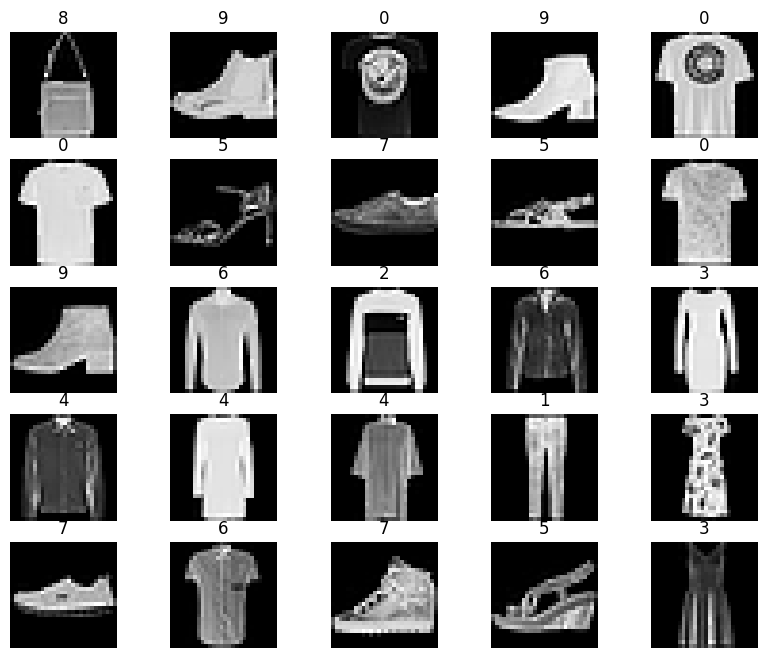

In [58]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Création de modèles
Pour définir un réseau neuronal dans PyTorch, nous créons une classe qui hérite de `nn.Module`. Nous définissons les couches du réseau dans la fonction `__init__` et spécifions comment les données passeront à travers le réseau dans la fonction ``forward``. Pour accélérer les opérations dans le réseau neuronal, nous le déplaçons vers le GPU s'il est disponible.

In [59]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## Optimisation des paramètres du modèle
Pour entraîner un modèle, nous avons besoin d'une fonction de perte et d'un optimiseur.  Nous utiliserons `nn.CrossEntropyLoss` pour la perte et `Stochastic Gradient Descent` pour l'optimisation.

In [60]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Dans une seule boucle d'apprentissage, le modèle fait des prédictions sur l'ensemble des données d'apprentissage (qui lui sont fournies par lots) et rétro-propage l'erreur de prédiction pour ajuster les paramètres du modèle.

In [61]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Nous pouvons également vérifier les performances du modèle par rapport à l'ensemble de données de test pour nous assurer qu'il apprend.

In [62]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Le processus d'entrainement se déroule sur plusieurs itérations (*époques*). Au cours de chaque époque, le modèle apprend des paramètres qui lui permettent de faire de meilleures prédictions. Nous imprimons la précision et la perte du modèle à chaque époque ; nous aimerions voir la précision augmenter et la perte diminuer à chaque époque.

In [63]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304143  [    0/60000]
loss: 2.295089  [ 6400/60000]
loss: 2.287698  [12800/60000]
loss: 2.288141  [19200/60000]
loss: 2.291366  [25600/60000]
loss: 2.292116  [32000/60000]
loss: 2.290787  [38400/60000]
loss: 2.289249  [44800/60000]
loss: 2.274554  [51200/60000]
loss: 2.292720  [57600/60000]
Test Error: 
 Accuracy: 30.7%, Avg loss: 0.035672 

Epoch 2
-------------------------------
loss: 2.262474  [    0/60000]
loss: 2.254426  [ 6400/60000]
loss: 2.236782  [12800/60000]
loss: 2.254334  [19200/60000]
loss: 2.267371  [25600/60000]
loss: 2.271662  [32000/60000]
loss: 2.271303  [38400/60000]
loss: 2.268336  [44800/60000]
loss: 2.241397  [51200/60000]
loss: 2.282161  [57600/60000]
Test Error: 
 Accuracy: 30.8%, Avg loss: 0.035160 

Epoch 3
-------------------------------
loss: 2.219392  [    0/60000]
loss: 2.207433  [ 6400/60000]
loss: 2.176809  [12800/60000]
loss: 2.212300  [19200/60000]
loss: 2.241279  [25600/60000]
loss: 2.246385  [32000/600

Au début, la précision ne sera pas très bonne (ce n'est pas grave !). Essayez de faire tourner la boucle pour plus d'"epochs" ou d'ajuster le "learning_rate" à un nombre plus grand. Il se peut aussi que la configuration du modèle que nous avons choisie ne soit pas optimale pour ce type de problème (ce n'est pas le cas). Des cours ultérieurs approfondiront les formes de modèles qui fonctionnent pour les problèmes de vision.

Sauvegarde des modèles
-------------
Une façon courante de sauvegarder un modèle consiste à sérialiser le dictionnaire d'états internes (contenant les paramètres du modèle).

In [64]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Chargement des modèles
----------------------------

Le processus de chargement d'un modèle consiste à recréer la structure du modèle et à y charger le dictionnaire d'états.
le dictionnaire d'états.

In [65]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

Ce modèle peut maintenant être utilisé pour faire des prévisions.

In [66]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
